In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))
y_train = to_categorical(y_train, num_classes=10) # one-hot 인코딩
x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))
y_test = to_categorical(y_test, num_classes=10) # one-hot 인코딩
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-multi2.keras', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,
                                                  restore_best_weights=True)

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64,callbacks=[checkpoint_cb, early_stopping_cb],
                  validation_data=(x_test, y_test))
#hist = model.fit(x_train, y_train, epochs=500, batch_size=64)

Epoch 1/1000


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1155 - loss: 2.3275 - val_accuracy: 0.1500 - val_loss: 2.2985
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1006 - loss: 2.2996 - val_accuracy: 0.1400 - val_loss: 2.2932
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.2930 - val_accuracy: 0.1100 - val_loss: 2.2952
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1469 - loss: 2.2837 - val_accuracy: 0.1000 - val_loss: 2.2998
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1406 - loss: 2.2859 - val_accuracy: 0.0900 - val_loss: 2.2995
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1482 - loss: 2.2743 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1409 - loss: 2.2804 - val_accuracy: 0.0900 - val_loss: 2.3102
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1590 - loss: 2.2727 - val_accuracy: 0.0600 - val_l

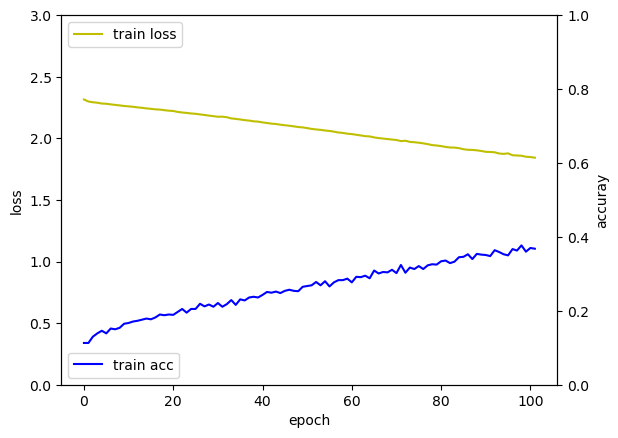

In [2]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [3]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1227 - loss: 2.2951 
loss_and_metrics : [2.2931580543518066, 0.14000000059604645]
